<a href="https://colab.research.google.com/github/vendkura/wine_quality/blob/main/vin_qualite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP2
---



In [ ]:
import pandas as p
import os
import numpy as n
import matplotlib.pyplot as m#import math as m
import scipy.stats as st
import seaborn as sn

In [ ]:
data = 'Wine_quality/dataset.csv'

vin = p.read_csv(data)
vin

,type de vin,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Vin-rouge,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Vin-rouge,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Vin-rouge,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Vin-rouge,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Vin-rouge,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Vin-blanc,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3
543,Vin-blanc,6.3,0.33,0.27,1.2,0.046,34.0,175.0,0.9934,3.37,0.54,9.4,6
544,Vin-blanc,8.3,0.39,0.70,10.6,0.045,33.0,169.0,0.9976,3.09,0.57,9.4,5
545,Vin-blanc,7.2,0.19,0.46,3.8,0.041,82.0,187.0,0.9932,3.19,0.60,11.2,7


# New Section

In [ ]:
# CHOIX DE LA VARIABLE
# Nous avons choisi la qualite du vin
quality = vin['quality']
quality

0      5
1      5
2      5
3      6
4      5
      ..
542    3
543    6
544    5
545    7
546    6
Name: quality, Length: 547, dtype: int64

In [ ]:
# VALEUR MINIMUM DE LA QUALITE
quality.min()

3

In [ ]:
# VALEUR MAXIMUM DE LA QUALITE
quality.max()

8

In [ ]:
# CALCUL DE LA MOYENNE DE LA QUALITE
quality.mean()

5.552102376599635

In [ ]:
# CALCUL DU MEDIANE
quality.median()

5.0

In [ ]:
# CALCUL DE L'EQUART TYPE
quality.std()

0.8400081569756036

In [ ]:
# CALCUL DE LA VARIANCE
quality.var()

0.7056137037855502

In [ ]:
# CALCUL A 2 VARIABLES

# CORRELATION
co = vin.corr()
cor = co['quality'][:-1]

<ipython-input-13-d83a810dc3be>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = vin.corr()


In [ ]:
cor.min()

-0.36661793469750703

In [ ]:
cor.max()

0.38107171918171406

In [ ]:
# De ce constat, nous deduisons que la variable 'alcohol' influence le plus sur la qualite du vin avec un coefficient de 0,38 qui est le plus eleve
corel = quality.corr(vin['alcohol'])
corel

0.38107171918171445

Text(0.5, 1.0, "Relation entre la quantite d'alcool et la qualité de vin")

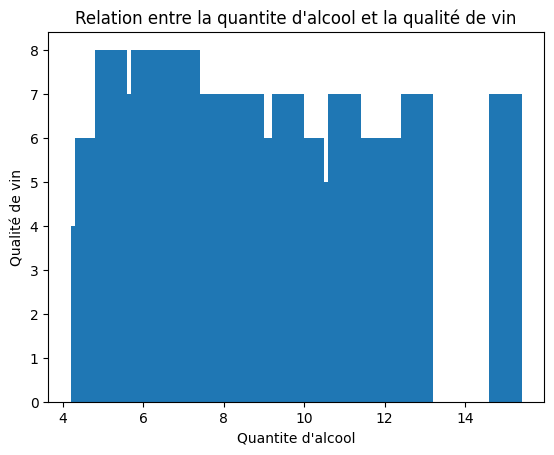

In [ ]:
# GRAPHIQUE REPRESENTATIF DE LA QUALITE DU VIN ET LA QUANTITE D'ALCOOL
gr = m.bar(vin['fixed acidity'],quality)

m.xlabel('Quantite d\'alcool')
m.ylabel('Qualité de vin')
m.title('Relation entre la quantite d\'alcool et la qualité de vin')

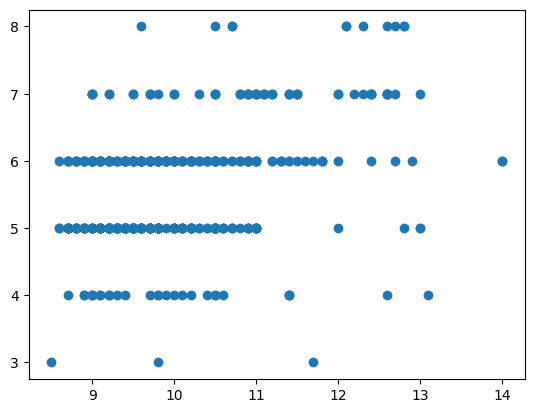

In [ ]:
gr = m.scatter(vin['alcohol'],quality)

In [ ]:
t_stat, p_value = st.ttest_ind(vin['alcohol'],quality)

print(f"Statistique: {t_stat}, Probabilite : {p_value}")

Statistique: 79.24542913291681, Probabilite : 0.0


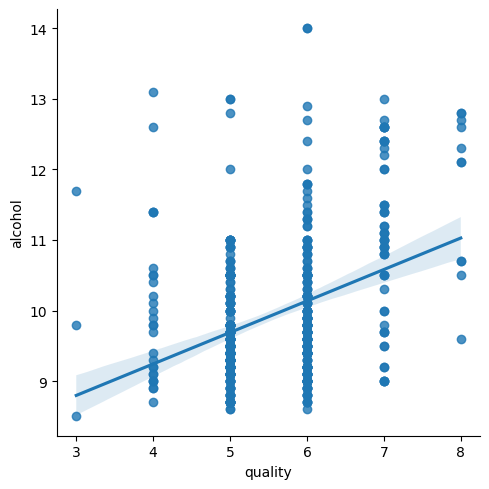

In [ ]:
sn.lmplot(x='quality', y='alcohol', data=vin)

In [ ]:
# Analyse Factorielle
## Installer "PCA"
## Nous avons choisit l'ACP car nous avons un contenue continue et numerique
from sklearn.decomposition import PCA

In [ ]:
import numpy as np

variables = vin[['fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
             ]]
variables = n.array(variables)

pca = PCA(n_components=2)
pca.fit(variables)

transformed = pca.transform(variables)
transformed_arr = np.array(transformed)

print(transformed)

[[-76.21490614  -1.6432696 ]
 [-40.8223144   -7.19596552]
 [-55.84802582  -0.6641577 ]
 ...
 [ 60.35596241   9.43031089]
 [ 89.29709666 -33.21337097]
 [ 45.80900611 -27.18912574]]


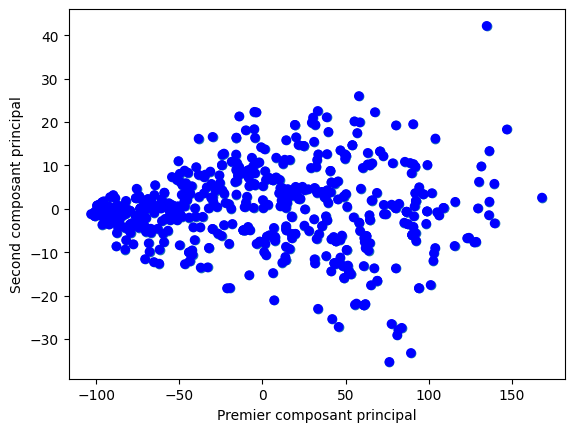

In [ ]:
# Representation graphique
m.scatter(transformed[:,0], transformed[:,1])
m.xlabel("Premier composant principal")
m.ylabel("Second composant principal")

# colors = ['r' if x > 0 else 'y' for x in variables[:, 0]]
colours = ['b' if y > 0 else 'r' for y in variables[:, 1]
          ]


m.scatter(transformed[:,0], transformed[:,1], c=colours)

m.show()


In [ ]:
## Valeurs propres
pca.explained_variance_

array([3939.13367275,   87.80639875])

In [ ]:
## Pourcentage de variance expliquer
perc = pca.explained_variance_ratio_
perc

array([0.97426645, 0.02171717])

In [ ]:
## Coeffecient de chaque variable
comp = pca.components_
comp

array([[-5.85251165e-03, -1.71530203e-03,  9.80068718e-04,
         4.68862989e-02, -2.13283112e-04,  2.41010123e-01,
         9.69365519e-01, -1.14310724e-06, -1.04983542e-03,
        -8.03954807e-04, -2.51758014e-03],
       [ 1.89622258e-03,  2.20835889e-03, -8.32595240e-04,
        -5.85596413e-02, -4.85961821e-04, -9.68084907e-01,
         2.43560204e-01, -2.01834215e-05,  4.37069225e-04,
         1.91090391e-03,  6.89665296e-03]])

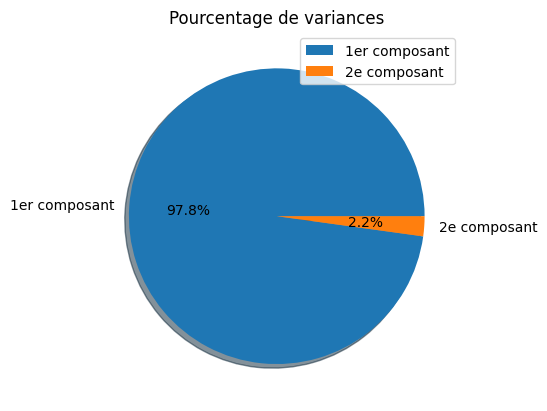

In [ ]:
lab = ['1er composant','2e composant']

# Récupérer les colonnes dans des listes
labels = lab
sizes =  perc

# Afficher le diagramme
m.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

# Personnaliser l'apparence
m.title('Pourcentage de variances')
m.legend(labels, loc='best')

# Afficher le diagramme
m.show()


In [ ]:
coef_corr = n.corrcoef(variables, rowvar=False)
coef_corr

array([[ 1.        ,  0.12825895,  0.26789034, -0.14850518,  0.23284989,
        -0.2845461 , -0.3207559 ,  0.42354067, -0.28945588,  0.34138037,
        -0.14231597],
       [ 0.12825895,  1.        , -0.52878328, -0.36437632,  0.298849  ,
        -0.51740982, -0.53701509,  0.23469867,  0.3295069 ,  0.25349073,
        -0.07695315],
       [ 0.26789034, -0.52878328,  1.        ,  0.28073091,  0.06677019,
         0.33858509,  0.36573586,  0.0582082 , -0.45000026,  0.06850487,
        -0.01269287],
       [-0.14850518, -0.36437632,  0.28073091,  1.        , -0.2300466 ,
         0.57500365,  0.60881101,  0.47117681, -0.39494995, -0.24605899,
        -0.35437913],
       [ 0.23284989,  0.298849  ,  0.06677019, -0.2300466 ,  1.        ,
        -0.16723198, -0.25006215,  0.25637134, -0.12370689,  0.59316077,
        -0.20057174],
       [-0.2845461 , -0.51740982,  0.33858509,  0.57500365, -0.16723198,
         1.        ,  0.83765749,  0.0057018 , -0.35494295, -0.24568516,
        -0.166

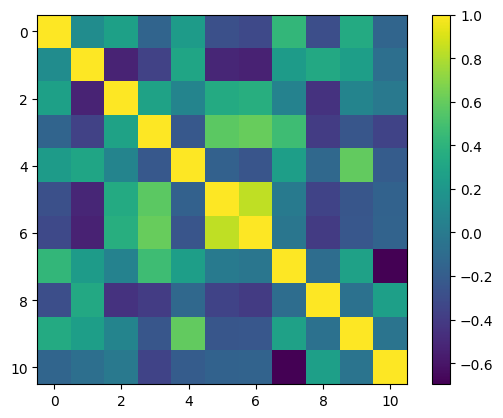

In [ ]:
# Representation graphique des valeurs du coefficient de correlation
m.imshow(coef_corr, cmap='viridis')
m.colorbar()
m.show()